In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import IPython.display as ipd

In [11]:
generator = tf.keras.models.load_model('snare_drum_generator.h5')

In [24]:
noise = tf.random.normal([1, 100])
audio = generator(noise, training=False)

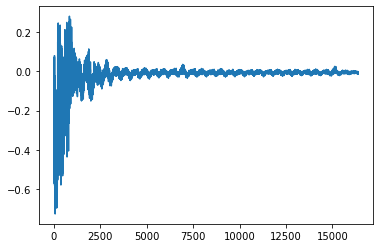

In [25]:
plt.plot(audio[0])

In [26]:
ipd.Audio(audio[0,:,0], rate=16000)